In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ShoppingData = pd.read_csv("Shopping_data.csv")

In [ ]:
ShoppingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
ShoppingData.drop("CustomerID", axis=1, inplace=True)

In [ ]:
if 'Genre' in ShoppingData.columns:
    ShoppingData.rename(columns={'Genre': 'Gender'}, inplace=True)

In [ ]:
ShoppingData = pd.get_dummies(ShoppingData, columns=['Gender'])

In [ ]:
ShoppingData['Gender'] = ShoppingData['Gender'].map({'Female': 1, 'Male': 0})

In [ ]:
print(ShoppingData.shape)

(200, 5)


In [ ]:
ShoppingData.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,False,True
1,21,15,81,False,True
2,20,16,6,True,False
3,23,16,77,True,False
4,31,17,40,True,False


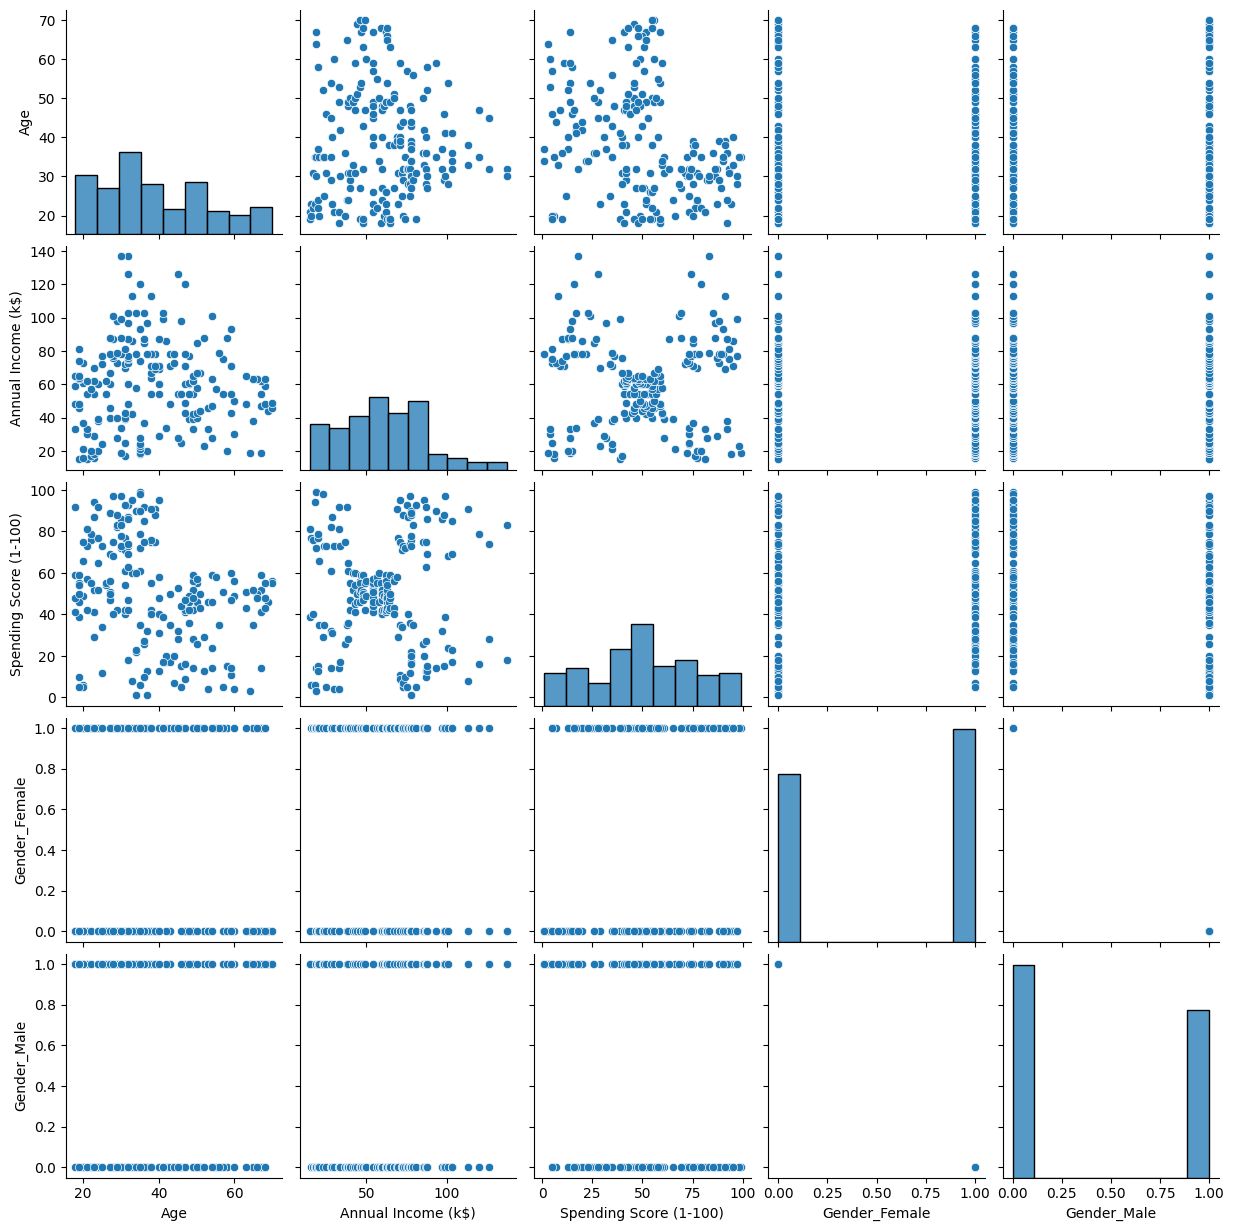

In [ ]:
sns.pairplot(ShoppingData)

In [ ]:
x = ShoppingData[["Age", "Annual Income (k$)", "Gender_Female","Gender_Male"]]
y = ShoppingData[["Spending Score (1-100)"]]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test, = train_test_split(x, y, test_size = 0.3,random_state=1)

print(x_train.shape)
print (x_test.shape)
print(y_train.shape)
print (y_test.shape)

(140, 4)
(60, 4)
(140, 1)
(60, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(model. coef_)
print(model. intercept_)

[[-0.65481183  0.01447776  1.47677178 -1.47677178]]
[74.23961999]


In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions_and_results = pd.DataFrame({"Actual Values" : y_test.values.reshape(-1,),
                                        "Predictions" : predictions.reshape(-1,)})
predictions_and_results.head()

,Actual Values,Predictions
0,51,58.702449
1,35,33.703777
2,14,44.108378
3,59,29.788076
4,39,50.302405


<Axes: >

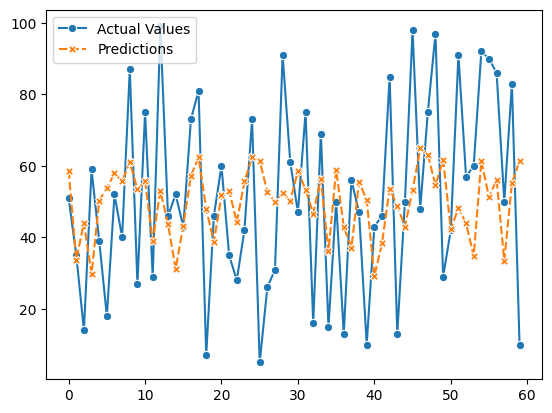

In [ ]:
sns.lineplot(data=predictions_and_results,markers=True)

In [ ]:
from sklearn import metrics
HataDegeri = metrics.mean_squared_error (y_test.values.reshape(-1,), predictions.reshape(-1, ))
print("Ortalama Kare Hatası :", HataDegeri)

Ortalama Kare Hatası : 662.8160801258379
